In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [28]:
import pickle

with open('alldata.pkl', 'rb') as in_file:
    data = pickle.load(in_file)


In [33]:
biosensor = []
masks = []

for d in data:
    biosensor.append(d['biosensor'])
    masks.append(d['mask'])


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 16 17 18 19 20 21 22 23 25 27
 28 31 32 37 38 39 40 41 42 43 44 45 46 47 49 53 54 55 57 58 59 62 63 64
 68 70 71 77 78 79 80 82]


(56,)

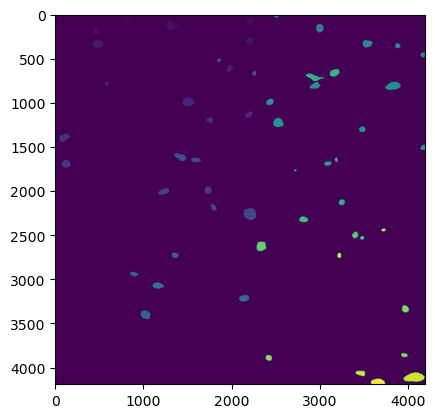

In [109]:
test_mask = masks[5]

# Nincs annyi sejt a maszkon ahány számmal jelöltük
plt.imshow(test_mask)
print(np.unique(test_mask))
np.unique(test_mask).shape

In [110]:
labeled_mask, num_cells = ndimage.label(test_mask)  # Label each cell
centers = ndimage.center_of_mass(test_mask, labeled_mask, range(1, num_cells+1))
# centers = np.round(centers).astype(int)  # Round to nearest integer
print(len(centers))  # Print or store the centers
print(num_cells)

56
56


In [111]:
mask = test_mask.astype(np.uint8)  # Convert to 8-bit unsigned integer
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)
# centroids = np.round(centroids[1:]).astype(int)  # Round to nearest integer, skip background
# print(centroids)  # Print or store the centers
print(num_cells)

56


In [ ]:
# To display all the elements of the matrix
np.set_printoptions(threshold=np.inf)
print(test_mask[550])

In [101]:
# A maszkokon meg kell keresni az összes sejt középpontját, és azok kooordinátáit kell eltárolni

import numpy as np
from scipy import ndimage

centers_ndimage = []

# Assuming masks is a list of 2D numpy arrays
for mask in masks:
    labeled_mask, num_cells = ndimage.label(mask)  # Label each cell
    centers = ndimage.center_of_mass(mask, labeled_mask, range(1, num_cells+1))
    centers = np.round(centers).astype(int)  # Round to nearest integer
    centers_ndimage.append(centers)  # Store the centers

In [102]:
import cv2
import numpy as np

centers_cv = []

# Assuming masks is a list of 2D numpy arrays
for mask in masks:
    mask = mask.astype(np.uint8)  # Convert to 8-bit unsigned integer
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)
    # centroids = np.round(centroids[1:]).astype(int)  # Round to nearest integer, skip background
    centers_cv.append(centroids)  # Print or store the centers

In [107]:
# Ez egyel kevesebb mert a 0-t is beleveszi
num_cells_unique = []
for mask in masks:
    num_cells_unique.append(np.unique(mask).shape[0])


In [103]:
found_cells_nd = []
found_cells_cv = []
for center in centers_ndimage:
    found_cells_nd.append(center.shape[0])
for center in centers_cv:
    found_cells_cv.append(center.shape[0])

In [108]:
for i in range(len(num_cells_unique)):
    print(num_cells_unique[i], found_cells_nd[i], found_cells_cv[i])

86 76 77
406 358 351
301 293 288
462 441 438
249 241 239
56 56 56
37 35 36
52 51 52
40 38 39
51 45 46
48 45 46
48 47 48
42 41 42
51 48 49
47 45 46
56 55 56
163 157 158
169 166 166
154 145 146
142 134 135
190 172 172
208 181 182
133 123 124
123 115 116
207 202 202
200 196 195
140 139 140
158 157 158
204 199 200
245 240 241
218 215 214
208 203 203
160 157 157
222 218 218
228 222 223
228 223 222
220 213 213
222 219 219
243 238 238
263 260 258
78 77 78
81 77 78
97 96 97
93 91 92
87 85 86
82 80 81
53 52 53
69 68 69
46 45 46
54 53 54
60 57 58
52 51 52
77 76 77
100 99 100
86 83 84
81 80 81
94 91 92
82 81 81
48 47 48
34 33 34
51 50 51
39 39 40
44 43 44
44 43 44
60 58 59
36 36 35
65 64 65
34 32 32
107 104 105
24 23 24
64 63 64
23 22 23
35 34 35
30 28 29
61 60 61
182 180 181
119 116 117
173 170 171
62 61 62
209 207 208
110 109 110
184 179 180
54 53 54
217 214 214
166 163 164
139 138 139
70 68 69
141 138 139
66 64 65
140 139 140
201 197 198
84 82 83
98 96 96
43 42 43
139 137 137
78 75 76
78 77 78